In [8]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

In [9]:
### Import thr data set
df=pd.read_csv("/content/sample_data/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
#### Data cleaning:


In [11]:
# 1. Check for missing values
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
print(df['bmi'].shape)
print(df['bmi'].unique())

(5110,)
[36.6  nan 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9
 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5
 33.7 23.1 32.  29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5
 33.2 32.8 40.4 25.3 30.2 47.5 20.3 30.  28.9 28.1 31.1 21.7 27.  24.1
 45.9 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.  28.8
 34.6 19.4 30.3 41.5 22.6 56.6 27.1 31.3 31.  31.7 35.8 28.4 20.1 26.7
 38.7 34.9 25.  23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 36.9 37.3 45.7
 34.2 23.6 22.3 37.1 45.  25.5 30.8 37.4 34.5 27.9 29.5 46.  42.5 35.5
 26.9 45.5 31.5 33.  23.4 30.7 20.5 21.5 40.  28.6 42.2 29.6 35.4 16.9
 26.8 39.3 32.6 35.9 21.2 42.4 40.5 36.7 29.3 19.6 18.  17.6 19.1 50.1
 17.7 54.6 35.  22.  39.4 19.7 22.5 25.2 41.8 60.9 23.7 24.5 31.2 16.
 31.6 25.1 24.8 18.3 20.  19.5 36.  35.3 40.1 43.1 21.4 34.3 27.6 16.5
 24.3 25.7 21.9 38.4 25.9 54.7 18.6 24.9 48.2 20.7 39.5 23.3 64.8 35.1
 43.6 21.  47.3 16.6 21.6 15.5 35.6 16.7 41.9 16.4 17.1 29.2 37.9 44.6

In [13]:
#### Try to predict the missing BMI values using linear regression
## Extract the index of the rows where the BMI has missing values
missing_index=df.index[df['bmi'].isnull()].tolist()
print(missing_index[0:5],len(missing_index)) #### first 5 indeces of the missing BMI values and the number of missing BMI values.

[1, 8, 13, 19, 27] 201


In [14]:
df.columns
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [15]:
### rearranging the columns in the data frame
df_bmi= df
column_names=['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level',
       'smoking_status', 'stroke','bmi']
df_bmi=df_bmi.reindex(columns=column_names)       
df_bmi.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0


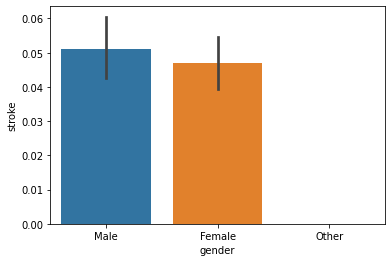

In [16]:
###### Graphical analysis

import seaborn as sns
sns.barplot(x='gender',y='stroke',data=df_bmi)

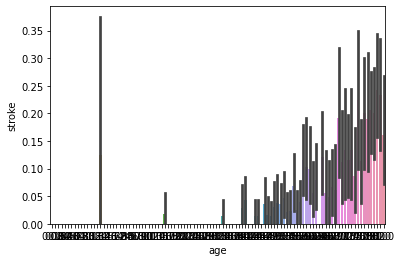

In [17]:
sns.barplot(x='age',y='stroke',data=df_bmi)

#### just one visible outlier, so mostly i'll ignore it for the time being!

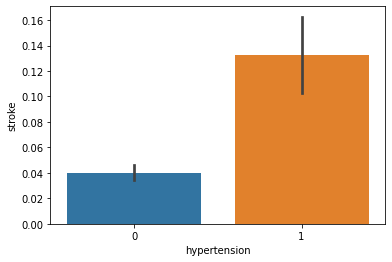

In [18]:
sns.barplot(x='hypertension',y='stroke',data=df_bmi)

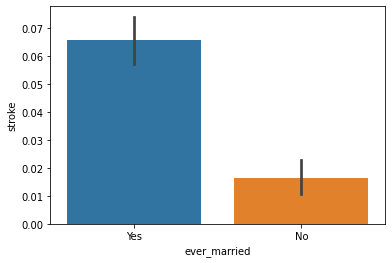

In [19]:
sns.barplot(x='ever_married',y='stroke',data=df_bmi)

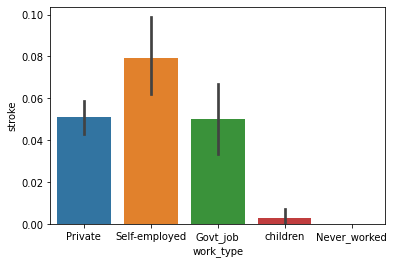

In [20]:
sns.barplot(x='work_type',y='stroke',data=df_bmi)

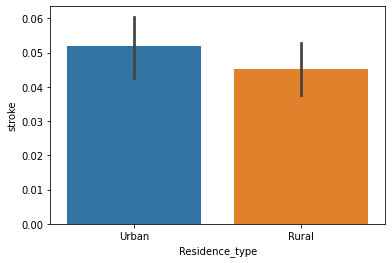

In [21]:
sns.barplot(x='Residence_type',y='stroke',data=df_bmi)

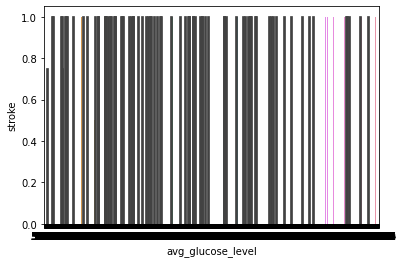

In [22]:
sns.barplot(x='avg_glucose_level',y='stroke',data=df_bmi)

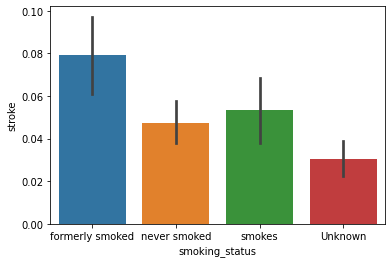

In [23]:
sns.barplot(x='smoking_status',y='stroke',data=df_bmi)

In [24]:
## Attribute and Target data 
x= df_bmi.iloc[:, :-1].values
y =df_bmi.iloc[:, -1].values
x.shape
x[0]

array([9046, 'Male', 67.0, 0, 1, 'Yes', 'Private', 'Urban', 228.69,
       'formerly smoked', 1], dtype=object)

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,5,6,7,9])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
x.shape

(5110, 22)

In [26]:
print(x[0])
print(y[0])
x_train=np.empty((4909,22))
x_test=np.empty((201,22))
y_train=np.empty((4909,1))
y_test=np.empty((201,1))
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

[0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 9046 67.0
 0 1 228.69 1]
36.6
(4909, 22) (4909, 1) (201, 22) (201, 1)


In [27]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
for i in range(len(x)):
  if i in missing_index:
    x_test= np.vstack([x_test,x[i]])
    y_test=np.vstack([y_test,y[i]])
  else:
    x_train= np.vstack([x_train,x[i]])
    y_train=np.vstack([y_train,y[i]])

x_test=np.delete(x_test,slice(0,201),0)
y_test=np.delete(y_test,slice(0,201),0)
x_train=np.delete(x_train,slice(0,4909),0)
y_train=np.delete(y_train,slice(0,4909),0)
print(len(x))
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
    


(4909, 22) (4909, 1) (201, 22) (201, 1)
5110
(4909, 22) (4909, 1) (201, 22) (201, 1)


In [28]:
print(x_train[0])
# y_train[0:5]
# y_test[0:5]
print(len(x_train[0]))
print(len(x_test[0]))


[0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 9046 67.0
 0 1 228.69 1]
22
22


In [29]:
print(len(x_train[0]))
print(len(x_test[0]))


22
22


In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(x_test)
print(y_pred[0:5])
print(y_test[0:5])

[[31.09840988]
 [28.76837808]
 [30.70599964]
 [28.77518522]
 [31.08752211]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [32]:
for i in range(len(y_test)):
  y_test[i]=y_pred[i]
print(y_test[0:5])  ##### these are predictions for missing values 

[[31.09840988]
 [28.76837808]
 [30.70599964]
 [28.77518522]
 [31.08752211]]


In [33]:
x = np.r_[x_train, x_test]
y = np.r_[y_train, y_test]

In [34]:
x.shape

(5110, 22)

In [35]:
### now bring Y to stroke 
temp=x[:,-1]
x=np.delete(x,21,1)
print(x.shape)



(5110, 21)


In [36]:
x=np.append(x,y,1)
print(x.shape)

(5110, 22)


In [37]:
y=temp
print(y[0:5],y.shape)

[1 1 1 1 1] (5110,)


In [38]:
print(x.shape)
print(y.shape)
print(y)

(5110, 22)
(5110,)
[1 1 1 ... 0 0 0]


In [39]:
#### Now standardize the features:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
print(x[0])

[-1.18950991  1.18998977 -0.01399046 -0.72388421  0.72388421 -0.38411064
 -0.06575636  0.86429656 -0.43688053 -0.39411222 -0.98407974  0.98407974
 -0.65801073  2.1849511  -0.7667743  -0.42731326 -1.29831203  1.05143428
 -0.32860186  4.18503199  2.70637544  0.99071131]


**Until the above cell, we used linear regreesssion to predict the BMI values, and restructured the X and Y data frames so that the Newly found out BMI values are in the attributes and the Stroke is the target array. We also standardized the values, so we have a common range to do univariate analysis**

In [40]:
np.unique(y)


array([0, 1], dtype=object)

In [41]:
###### Lets start with Logistic regression:
### Split X and y into train and test datasets:
y=y.astype('int32')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [42]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

[[ 0.84068236 -0.84034336 -0.01399046 ... -0.2389468  -0.32658926
   1.27527953]
 [ 0.84068236 -0.84034336 -0.01399046 ... -0.2389468  -0.70976801
  -0.0311473 ]
 [ 0.84068236 -0.84034336 -0.01399046 ... -0.2389468  -0.36258818
  -0.70376309]
 ...
 [-1.18950991  1.18998977 -0.01399046 ... -0.2389468  -0.56356378
  -0.0958219 ]
 [-1.18950991  1.18998977 -0.01399046 ... -0.2389468   0.80682477
  -0.58734882]
 [-1.18950991  1.18998977 -0.01399046 ... -0.2389468  -0.81511455
  -0.17343141]]
[0 0 0 ... 0 0 0]
[[ 0.84068236 -0.84034336 -0.01399046 ...  4.18503199  0.46693307
  -0.16049649]
 [-1.18950991  1.18998977 -0.01399046 ... -0.2389468  -0.3550792
   1.01658115]
 [-1.18950991  1.18998977 -0.01399046 ... -0.2389468   2.27483004
   3.09910312]
 ...
 [ 0.84068236 -0.84034336 -0.01399046 ... -0.2389468  -0.48736973
  -0.5744139 ]
 [ 0.84068236 -0.84034336 -0.01399046 ... -0.2389468  -0.70071306
  -0.83311228]
 [-1.18950991  1.18998977 -0.01399046 ... -0.2389468  -0.50305025
  -0.58734882]]

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1212    0]
 [  66    0]]


0.9483568075117371

In [46]:
#### For the logistic regression we have an accuracy of 94 % 

In [47]:
##### Now lets try to classify using K Nearest neighbours:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred = classifier_knn.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
accuracy_score(y_test, y_pred)

[[1208    4]
 [  66    0]]


0.945226917057903

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
y_pred = classifier_DT.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


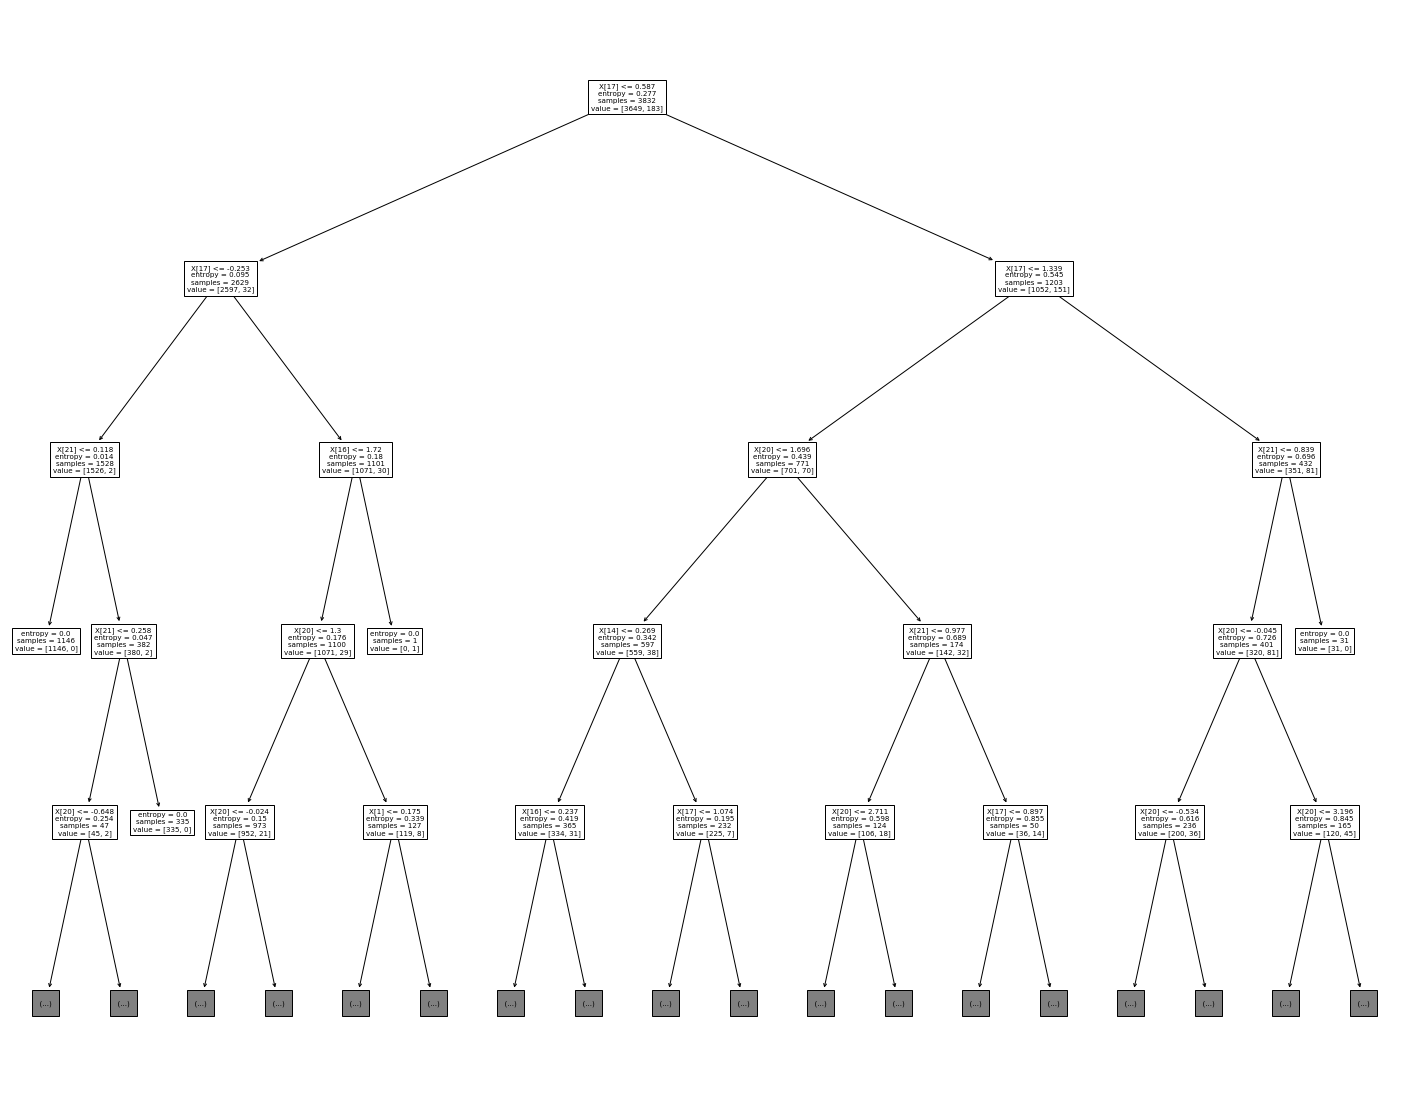

In [52]:
import matplotlib.pyplot as plt
from sklearn import tree
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(classifier_DT,max_depth=4)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_DT = confusion_matrix(y_test, y_pred)
print(cm_DT)
accuracy_score(y_test, y_pred)

[[1158   54]
 [  52   14]]


0.917057902973396

In [57]:
#### Random Forests:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [59]:
y_pred = classifier_RF.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [60]:
cm_RF = confusion_matrix(y_test, y_pred)
print(cm_RF)
accuracy_score(y_test, y_pred)

[[1205    7]
 [  64    2]]


0.9444444444444444